In [4]:
import random

def bernoulli(p):
  a = random.random()
  return 1 if a <= p else 0

In [5]:
n = 1000
p_bernoulli = 0.2

In [6]:
bernoulli_realizations = [bernoulli(p_bernoulli) for _ in range(n)]

mean_estimate = sum(bernoulli_realizations) / n
variance_estimate = sum((x - mean_estimate) ** 2 for x in bernoulli_realizations) / (n - 1)

true_mean = p_bernoulli
true_variance = p_bernoulli * (1 - p_bernoulli)

# Вывод результатов
print("Математическое ожидание:")
print(f"Оценка: {mean_estimate}, Истинное значение: {true_mean}")

print("\nДисперсия:")
print(f"Оценка: {variance_estimate}, Истинное значение: {true_variance}")

Математическое ожидание:
Оценка: 0.21, Истинное значение: 0.2

Дисперсия:
Оценка: 0.166066066066063, Истинное значение: 0.16000000000000003


In [7]:
m_binomial = 6
p_binomial = 0.75

In [8]:
def binomial(m, p):
    x = 0
    for _ in range(m):
        x += bernoulli(p)
    return x

In [9]:
binomial_realizations = [binomial(m_binomial, p_binomial) for _ in range(n)]
mean_estimate = sum(binomial_realizations) / n
variance_estimate = sum((x - mean_estimate) ** 2 for x in binomial_realizations) / (n - 1)

true_mean = m_binomial * p_binomial
true_variance = m_binomial * p_binomial * (1 - p_binomial)

print("Математическое ожидание:")
print(f"Оценка: {mean_estimate}, Истинное значение: {true_mean}")

print("\nДисперсия:")
print(f"Оценка: {variance_estimate}, Истинное значение: {true_variance}")

Математическое ожидание:
Оценка: 4.514, Истинное значение: 4.5

Дисперсия:
Оценка: 1.2590630630630675, Истинное значение: 1.125


Вычислить несмещенные оценки коэффициентов эксцесса и асимметрии и сравнить с
истинными значениями.


In [10]:
import scipy.stats 
from scipy.stats import kurtosis, skew, bernoulli

kurtosis_estimate_bernoulli = kurtosis(bernoulli_realizations, fisher=True)
skewness_estimate_bernoulli = skew(bernoulli_realizations)

kurtosis_estimate_binomial = kurtosis(binomial_realizations, fisher=True)
skewness_estimate_binomial = skew(binomial_realizations)

true_kurtosis_bernoulli = bernoulli.stats(p_bernoulli, moments='k')
true_skewness_bernoulli = bernoulli.stats(p_bernoulli, moments='s')

print("\nЭксцесс:")
print(f"Оценка (bernoulli): {kurtosis_estimate_bernoulli}, Истинное значение: {true_kurtosis_bernoulli}")
print("\nАсимметрия:")
print(f"Оценка (bernoulli): {skewness_estimate_bernoulli}, Истинное значение: {true_skewness_bernoulli}")

true_kurtosis_binomial = scipy.stats.describe(binomial_realizations).kurtosis
true_skewness_binomial = scipy.stats.describe(binomial_realizations).skewness

print("\nЭксцесс:")
print(f"Оценка (binomial): {kurtosis_estimate_binomial}, Истинное значение: {true_kurtosis_binomial}")
print("\nАсимметрия:")
print(f"Оценка (binomial): {skewness_estimate_binomial}, Истинное значение: {true_skewness_binomial}")


Эксцесс:
Оценка (bernoulli): 0.027727546714889417, Истинное значение: 0.2499999999999991

Асимметрия:
Оценка (bernoulli): 1.4239829868066858, Истинное значение: 1.4999999999999993

Эксцесс:
Оценка (binomial): -0.14440655861068885, Истинное значение: -0.14440655861068885

Асимметрия:
Оценка (binomial): -0.5155993362815473, Истинное значение: -0.5155993362815473


1.3) Построить гистограмму и сравнить с графиком теоретического распределения
вероятностей (на одном графике).


In [11]:
import matplotlib.pyplot as plt
from scipy.stats import binom, bernoulli
import numpy as np

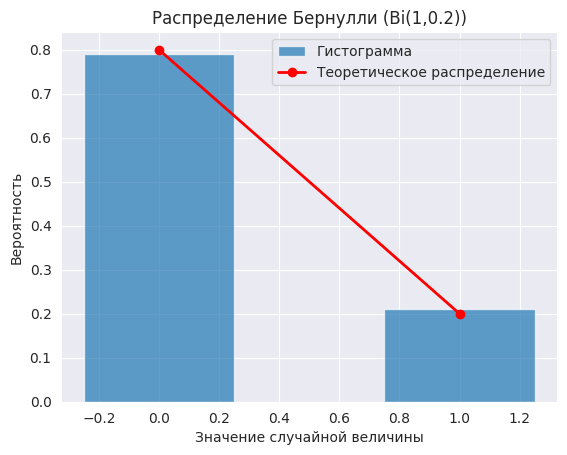

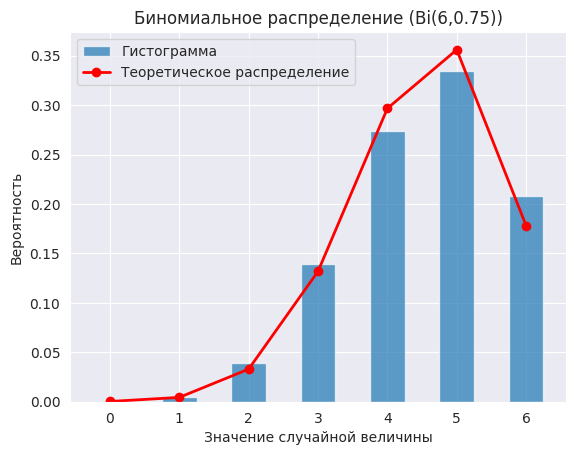

In [12]:
def plot_histogram_vs_theoretical(realizations, theoretical_pmf, title):
    plt.hist(realizations, bins=np.arange(min(realizations), max(realizations) + 1.5) - 0.5, rwidth=0.5, density=True, alpha=0.7, label='Гистограмма')
    x = np.arange(min(realizations), max(realizations) + 1)
    plt.plot(x, theoretical_pmf(x), 'ro-', lw=2, label='Теоретическое распределение')

    plt.title(title)
    plt.xlabel('Значение случайной величины')
    plt.ylabel('Вероятность')
    plt.legend()
    plt.show()

def bernoulli_pmf(x):
    return bernoulli.pmf(x, p_bernoulli)

def binomial_pmf(x):
    return binom.pmf(x, m_binomial, p_binomial)

plot_histogram_vs_theoretical(bernoulli_realizations, bernoulli_pmf, 'Распределение Бернулли (Bi(1,0.2))')

plot_histogram_vs_theoretical(binomial_realizations, binomial_pmf, 'Биномиальное распределение (Bi(6,0.75))')


1.4) Построить график эмпирической функции распределения и сравнить с графиком
теоретической функции распределения.

In [13]:
def plot_empirical_cdf(realizations, title):
    sorted_realizations = np.sort(realizations)
    n = len(realizations)
    empirical_cdf = np.arange(1, n + 1) / n

    plt.step(sorted_realizations, empirical_cdf, where='post', label='ЭФР')

    plt.title(title)
    plt.xlabel('Значение случайной величины')
    plt.ylabel('Эмпирическая функция распределения')
    plt.legend()
    plt.show()

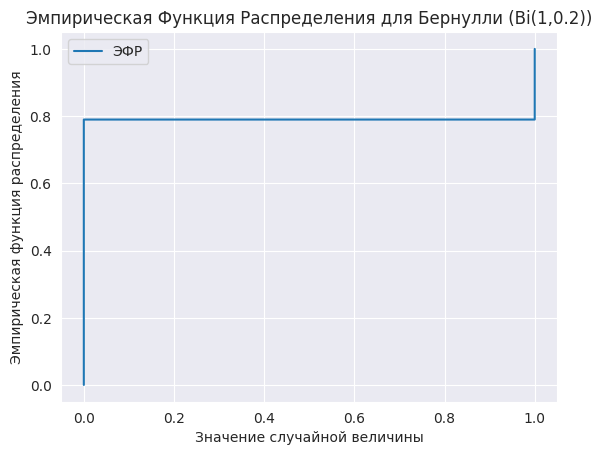

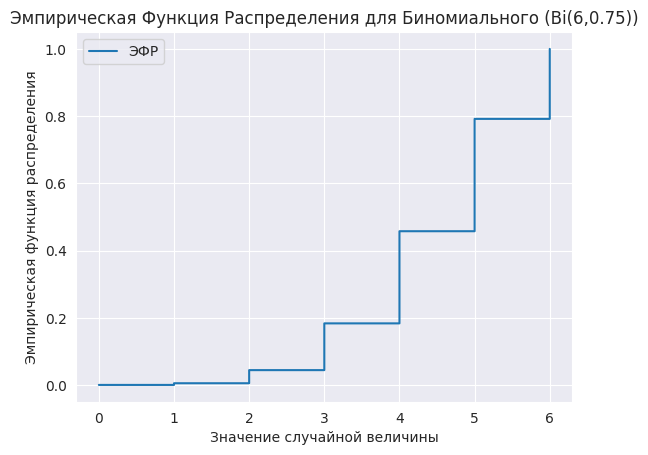

In [14]:
def bernoulli_cdf(x):
    return bernoulli.cdf(x, p_bernoulli)

def binomial_cdf(x):
    return binom.cdf(x, m_binomial, p_binomial)

plot_empirical_cdf(bernoulli_realizations, 'Эмпирическая Функция Распределения для Бернулли (Bi(1,0.2))')

plot_empirical_cdf(binomial_realizations, 'Эмпирическая Функция Распределения для Биномиального (Bi(6,0.75))')

1.5) Проверить принадлежность смоделированной последовательности к заданному
распределению.

In [15]:
def chi_squared_test(observed, expected, discrete=False):
    degrees_of_freedom = len(observed) - 1

    if discrete:
        chi2_statistic = sum([(observed[i] - expected[i]) ** 2 / expected[i] for i in range(len(observed))])
    else:
        chi2_statistic = sum((observed - expected) ** 2 / expected)

    return chi2_statistic, degrees_of_freedom

In [16]:
hist_bins = np.arange(min(bernoulli_realizations), max(bernoulli_realizations) + 2) - 0.5
observed_counts, _ = np.histogram(bernoulli_realizations, bins=hist_bins)
expected_counts = np.array([len(bernoulli_realizations) * (bernoulli.cdf(hist_bins[i+1], p_bernoulli) - bernoulli.cdf(hist_bins[i], p_bernoulli)) for i in range(len(hist_bins)-1)])
discrete = True
chi2_statistic, degrees_of_freedom = chi_squared_test(observed_counts, expected_counts, discrete)
alpha = 0.05
critical_value = scipy.stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print("Тест Пирсона для Бернулли:")
print(f"Статистика: {chi2_statistic}")

if chi2_statistic > critical_value:
    print("H1: данные не принадлежат заданному распределению.")
else:
    print("H0: данные принадлежат заданному распределению.")

Тест Пирсона для Бернулли:
Статистика: 0.6250000000000058
H0: данные принадлежат заданному распределению.


In [17]:
hist_bins = np.arange(min(binomial_realizations), max(binomial_realizations) + 2) - 0.5
observed_counts, _ = np.histogram(binomial_realizations, bins=hist_bins)
expected_counts = np.array([len(binomial_realizations) * (binom.cdf(hist_bins[i+1], m_binomial, p_binomial) - binom.cdf(hist_bins[i], m_binomial, p_binomial)) for i in range(len(hist_bins)-1)])
discrete = True
chi2_statistic, degrees_of_freedom = chi_squared_test(observed_counts, expected_counts, discrete)
critical_value = scipy.stats.chi2.ppf(1 - alpha, degrees_of_freedom)
print("Тест Пирсона для биномиального распределения:")
print(f"Статистика: {chi2_statistic}")

if chi2_statistic > critical_value:
    print("H1: данные не принадлежат заданному распределению.")
else:
    print("H0: данные принадлежат заданному распределению.")


Тест Пирсона для биномиального распределения:
Статистика: 12.065132510288066
H0: данные принадлежат заданному распределению.


2.1) Осуществить моделирование n = 10000 реализаций случайной величины из нормального
закона распределения $N(m, s^2)$ с заданными параметрами. Для моделирования воспользоваться
алгоритмом, основанным на ЦПТ; (в качестве количества используемых слагаемых можно
взять N = 48, или 192, но должна быть возможность быстро изменить данный параметр).
Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с
истинными значениями.

In [35]:
import numpy as np
m_normal = 0  # математическое ожидание
s_normal = 4  # стандартное отклонение

n = 10000

N = 48

def generate_normal_sample(m, s2, N):
    sample_sum = 0
    for _ in range(N):
        sample_sum += random.uniform(0, 1)
    z = (math.sqrt(12 / N) * (sample_sum - N / 2)) * s2 + m
    return z

normal_realizations = [generate_normal_sample(0, 4, N) for _ in range(n)]

sample_mean = np.mean(normal_realizations)
sample_variance = np.var(normal_realizations, ddof=1)

true_mean = m_normal
true_variance = s_normal**2

print(f"Истинное математическое ожидание: {true_mean}")
print(f"Истинная дисперсия: {true_variance}\n")

print(f"Оценка математического ожидания: {sample_mean}")
print(f"Оценка дисперсии: {sample_variance}\n")

mean_error = np.abs(sample_mean - true_mean)
variance_error = np.abs(sample_variance - true_variance)

print(f"Погрешность в оценке математического ожидания: {mean_error}")
print(f"Погрешность в оценке дисперсии: {variance_error}")


Истинное математическое ожидание: 0
Истинная дисперсия: 16

Оценка математического ожидания: -0.03065748230670775
Оценка дисперсии: 16.239344351156234

Погрешность в оценке математического ожидания: 0.03065748230670775
Погрешность в оценке дисперсии: 0.23934435115623387


2.2) Смоделировать n = 10000 случайных величин из заданных абсолютно непрерывных
распределений. Вычислить несмещенные оценки математического ожидания и дисперсии,
сравнить их с истинными значениями (если это возможно). Если математического ожидания не
существует, то вычислить выборочное значение медианы и сравнить его с теоретическим.


Логнормальное LN(m, s^2), m = 2, s^2 = 16


In [19]:
import random
import math


In [20]:
m_true_lognormal = 2
s2_true_lognormal = 16

N_cpt = 192
def generate_lognormal_sample(m, s2, N):
    sample_sum = 0
    for _ in range(N):
        sample_sum += random.uniform(0, 1)
    z = math.sqrt(12 / N) * (sample_sum - N / 2)
    return math.exp(m + math.sqrt(s2) * z)

lognormal_samples = [generate_lognormal_sample(m_true_lognormal, s2_true_lognormal, N_cpt) for _ in range(n)]

mean_estimate_lognormal = sum(lognormal_samples) / n
variance_estimate_lognormal = sum((x - mean_estimate_lognormal) ** 2 for x in lognormal_samples) / (n - 1)

true_mean_lognormal = math.exp(m_true_lognormal + s2_true_lognormal / 2)
true_variance_lognormal = (math.exp(s2_true_lognormal) - 1) * math.exp(2 * m_true_lognormal + s2_true_lognormal)

# Вывод результатов для логнормального распределения
print("\nЛогнормальное распределение:")
print("\nМатематическое ожидание:")
print(f"Оценка: {mean_estimate_lognormal}, Истинное значение: {true_mean_lognormal}")

print("\nДисперсия:")
print(f"Оценка: {variance_estimate_lognormal}, Истинное значение: {true_variance_lognormal}")


Логнормальное распределение:

Математическое ожидание:
Оценка: 70075.18421954512, Истинное значение: 22026.465794806718

Дисперсия:
Оценка: 24772229179584.793, Истинное значение: 4311231061949999.5


Логистическое LG(a,b), a = 1, b = 1

In [21]:
import math
import random

def inverse_logistic_distribution(y, mu, k):
    x = mu + k * math.log(y / (1 - y))
    return x

def generate_logistic_distribution(n, mu, k):
    realizations = []
    for _ in range(n):
        y = random.random()
        x = inverse_logistic_distribution(y, mu, k)
        realizations.append(x)
    return realizations

mu_logistic = 2.0  # среднее значение
k_logistic = 3.0   # параметр k
n_logistic = 10000
logistic_realizations = generate_logistic_distribution(n_logistic, mu_logistic, k_logistic)
mean_estimate_logistic = sum(logistic_realizations) / n_logistic
variance_estimate_logistic = sum((x - mean_estimate_logistic) ** 2 for x in logistic_realizations) / (n_logistic - 1)
theoretical_variance_logistic = (math.pi ** 2) * (k_logistic ** 2) / 3
print("Математическое ожидание:")
print(f"Оценка: {mean_estimate_logistic}, Теоретическое значение: {mu_logistic}")

print("\nДисперсия:")
print(f"Оценка: {variance_estimate_logistic}, Теоретическое значение: {theoretical_variance_logistic}")



Математическое ожидание:
Оценка: 1.9929823383617307, Теоретическое значение: 2.0

Дисперсия:
Оценка: 30.053921245830008, Теоретическое значение: 29.608813203268074


2.3) Построить гистограммы, сравнить с теоретическими плотностями распределения
вероятностей.

In [22]:
import seaborn as sns
from scipy.stats import logistic

Нормальное распределение

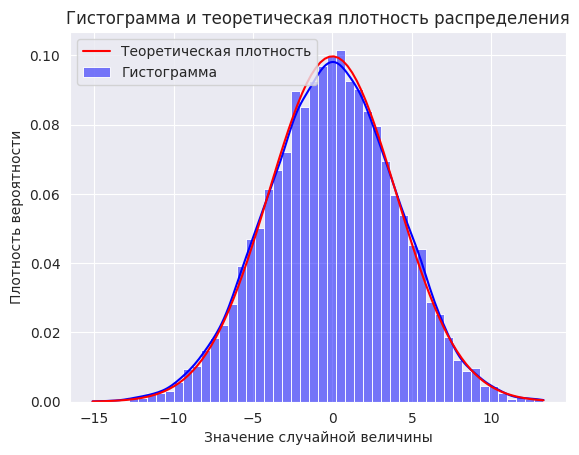

In [36]:
x = np.linspace(min(normal_realizations), max(normal_realizations), 100)
pdf = (1 / (s_normal * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - m_normal) / s_normal)**2)

sns.histplot(normal_realizations, kde=True, bins=50, color='b', stat='density', label='Гистограмма')
plt.plot(x, pdf, 'r', label='Теоретическая плотность')

plt.title('Гистограмма и теоретическая плотность распределения')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()



Логнормальное распределение

In [37]:
from scipy.stats import norm

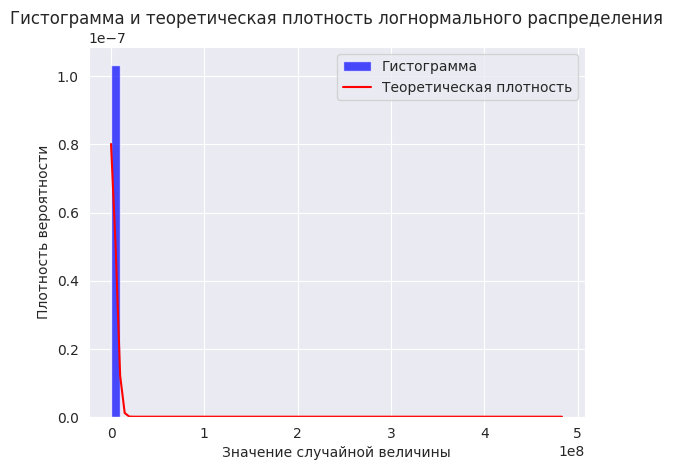

In [25]:
# Генерация значений для теоретической плотности логнормального распределения
x_lognormal = np.linspace(min(lognormal_samples), max(lognormal_samples), 100)
pdf_lognormal = norm.pdf(x_lognormal, loc=mean_estimate_lognormal, scale=np.sqrt(variance_estimate_lognormal))

# Построение гистограммы и теоретической плотности логнормального распределения
plt.hist(lognormal_samples, bins=50, color='b', density=True, alpha=0.7, label='Гистограмма')
plt.plot(x_lognormal, pdf_lognormal, 'r', label='Теоретическая плотность')

plt.title('Гистограмма и теоретическая плотность логнормального распределения')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Логистическое распределение

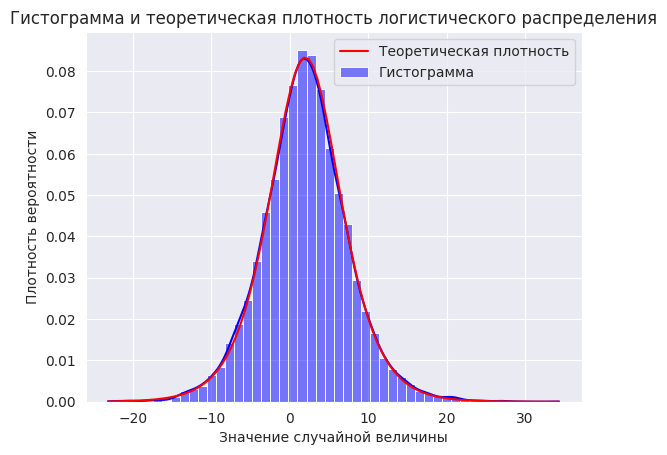

In [26]:
x_logistic = np.linspace(min(logistic_realizations), max(logistic_realizations), 100)
pdf_logistic = logistic.pdf(x_logistic, loc=mu_logistic, scale=k_logistic)
sns.histplot(logistic_realizations, kde=True, bins=50, color='b', stat='density', label='Гистограмма')
plt.plot(x_logistic, pdf_logistic, 'r', label='Теоретическая плотность')

plt.title('Гистограмма и теоретическая плотность логистического распределения')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()


2.4) Реализовать любой тест согласия для проверки статистических гипотез о принадлежности
сгенерированных выборок соответствующим распределениям.

Нормальное распределение

In [38]:
hist_bins_normal = np.arange(min(normal_realizations), max(normal_realizations) + 2) - 0.5
observed_counts_normal, _ = np.histogram(normal_realizations, bins=hist_bins_normal)
expected_counts_normal = np.array([len(normal_realizations) * (scipy.stats.norm.cdf(hist_bins_normal[i+1], loc=m_normal, scale=s_normal) - scipy.stats.norm.cdf(hist_bins_normal[i], loc=m_normal, scale=s_normal)) for i in range(len(hist_bins_normal)-1)])
discrete_normal = True
chi2_statistic_normal, degrees_of_freedom_normal = chi_squared_test(observed_counts_normal, expected_counts_normal, discrete_normal)
alpha_normal = 0.05
critical_value_normal = scipy.stats.chi2.ppf(1 - alpha_normal, degrees_of_freedom_normal)

print("Тест Пирсона для нормального распределения:")
print(f"Статистика: {chi2_statistic_normal}")

if chi2_statistic_normal > critical_value_normal:
    print("H1: данные не принадлежат нормальному распределению.")
else:
    print("H0: данные принадлежат нормальному распределению.")

Тест Пирсона для нормального распределения:
Статистика: 24.036421573147216
H0: данные принадлежат нормальному распределению.


Логистическое распределение

In [28]:
hist_bins = np.arange(min(logistic_realizations), max(logistic_realizations) + 2) - 0.5
observed_counts, _ = np.histogram(logistic_realizations, bins=hist_bins)
expected_counts = np.array([len(logistic_realizations) * (logistic.cdf(hist_bins[i+1], loc=mu_logistic, scale=k_logistic) - logistic.cdf(hist_bins[i], loc=mu_logistic, scale=k_logistic)) for i in range(len(hist_bins)-1)])
discrete = True
chi2_statistic, degrees_of_freedom = chi_squared_test(observed_counts, expected_counts, discrete)
alpha = 0.05
critical_value = scipy.stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print("Тест Пирсона для логистического распределения:")
print(f"Статистика: {chi2_statistic}")

if chi2_statistic > critical_value:
    print("H1: данные не принадлежат заданному распределению.")
else:
    print("H0: данные принадлежат заданному распределению.")

Тест Пирсона для логистического распределения:
Статистика: 70.96201897150138
H0: данные принадлежат заданному распределению.


Логнормальное распределение

In [29]:
import numpy as np
from scipy.stats import lognorm, chi2

observed_values, bin_edges = np.histogram(lognormal_samples, bins='auto', density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

shape = s2_true_lognormal
scale = np.exp(m_true_lognormal)

expected_values = lognorm.pdf(bin_centers, shape, loc=0, scale=scale)

chi_squared_stat = np.sum((observed_values - expected_values) ** 2 / expected_values)

degrees_of_freedom = len(bin_centers) - 1

p_value = 1 - chi2.cdf(chi_squared_stat, degrees_of_freedom)

print("\nТест Пирсона:")
print(f"Хи-квадрат статистика: {chi_squared_stat}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: выборка не соответствует логнормальному распределению.")
else:
    print("Не отвергаем нулевую гипотезу: выборка соответствует логнормальному распределению.")






Тест Пирсона:
Хи-квадрат статистика: 6.33717756014636
Не отвергаем нулевую гипотезу: выборка соответствует логнормальному распределению.
